#Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

#-------------------------------------

from sklearn.preprocessing import StandardScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
#-------------------------------------

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

#Importing dataset

In [2]:

data = pd.read_csv("ecommerce_recommendation_dataset.csv")
df=pd.DataFrame(data)
print(df.shape)
df.head()

(60000, 51)


user_id  product_id   category   price  rating  review_count  user_age  \
0    78517        1645      Books  842.23       2           155        24   
1    52887         100      Books  253.76       3           331        43   
2    59395         585      Books  483.65       2           236        64   
3    54739        3774  Groceries  459.37       2           227        34   
4    42723        2119  Groceries  150.11       2           214        51   

  user_gender user_location  purchase_history  ...  product_rating_variance  \
0       Other         Urban             False  ...                     0.13   
1       Other      Suburban             False  ...                     0.02   
2      Female         Rural              True  ...                     1.55   
3      Female         Urban             False  ...                     1.41   
4      Female         Urban              True  ...                     1.29   

   review_sentiment_score user_engagement_score  ad_click_rate time_of_day  \
0                   -0.28                  0.68           0.04       Night   
1                    0.28                  0.11           0.89     Morning   
2                    0.23                  0.35           0.99     Evening   
3                    0.93                  0.73           0.16   Afternoon   
4                    0.11                  0.26           0.17       Night   

  day_of_week  season payment_method  coupon_used  product_popularity  
0    Thursday  Summer     Debit Card        False                0.54  
1    Saturday  Summer     Debit Card        False                0.77  
2     Tuesday    Fall     Debit Card        False                0.14  
3     Tuesday  Spring    Credit Card        False                0.18  
4   Wednesday  Spring         PayPal        False                0.66  

[5 rows x 51 columns]

In [3]:
for col in df.columns:
  print(col,df[col].nunique())

user_id 45154
product_id 4999
category 5
price 45014
rating 5
review_count 500
user_age 52
user_gender 3
user_location 3
purchase_history 2
time_on_page 2951
add_to_cart_count 10
search_keywords 5
discount_applied 2
user_membership 4
user_browser 4
user_device 3
purchase_time 8749
session_duration 55235
clicks_on_ads 20
page_views 99
referral_source 4
wishlist_additions 20
cart_abandonment_rate 101
average_spent 56634
user_income 59912
user_education 4
user_marital_status 4
product_availability 3
stock_status 3
product_return_rate 101
product_color 5
product_size 3
is_top_seller 2
discount_percentage 5001
time_to_purchase 25810
delivery_time 1401
shipping_fee 5001
seller_rating 5
seller_response_time 7100
seller_location 3
product_rating_variance 201
review_sentiment_score 201
user_engagement_score 101
ad_click_rate 101
time_of_day 4
day_of_week 7
season 4
payment_method 4
coupon_used 2
product_popularity 101


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.columns

Index(['user_id', 'product_id', 'category', 'price', 'rating', 'review_count',
       'user_age', 'user_gender', 'user_location', 'purchase_history',
       'time_on_page', 'add_to_cart_count', 'search_keywords',
       'discount_applied', 'user_membership', 'user_browser', 'user_device',
       'purchase_time', 'session_duration', 'clicks_on_ads', 'page_views',
       'referral_source', 'wishlist_additions', 'cart_abandonment_rate',
       'average_spent', 'user_income', 'user_education', 'user_marital_status',
       'product_availability', 'stock_status', 'product_return_rate',
       'product_color', 'product_size', 'is_top_seller', 'discount_percentage',
       'time_to_purchase', 'delivery_time', 'shipping_fee', 'seller_rating',
       'seller_response_time', 'seller_location', 'product_rating_variance',
       'review_sentiment_score', 'user_engagement_score', 'ad_click_rate',
       'time_of_day', 'day_of_week', 'season', 'payment_method', 'coupon_used',
       'product_popular

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

In [9]:
df.describe()

user_id    product_id         price        rating  review_count  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean   50109.404617   2491.198100    502.938655      2.996383    250.173567   
std    28913.382290   1441.522417    288.082193      1.415970    144.807302   
min        1.000000      1.000000      5.010000      1.000000      0.000000   
25%    25022.500000   1245.000000    252.802500      2.000000    124.000000   
50%    50208.500000   2481.500000    504.355000      3.000000    251.000000   
75%    75141.500000   3731.000000    752.592500      4.000000    375.000000   
max    99997.000000   4999.000000    999.990000      5.000000    499.000000   

           user_age  time_on_page  add_to_cart_count  session_duration  \
count  60000.000000  60000.000000       60000.000000      60000.000000   
mean      43.425617     15.221682           4.498617       1797.510736   
std       14.995046      8.485544           2.863739       1037.231985   
min       18.000000      0.500000           0.000000          1.030000   
25%       30.000000      7.910000           2.000000        901.792500   
50%       43.000000     15.170000           5.000000       1798.315000   
75%       56.000000     22.562500           7.000000       2692.330000   
max       69.000000     30.000000           9.000000       3599.970000   

       clicks_on_ads    page_views  wishlist_additions  cart_abandonment_rate  \
count   60000.000000  60000.000000        60000.000000           60000.000000   
mean        9.506933     50.105483            9.489833               0.500427   
std         5.771029     28.492183            5.774847               0.289402   
min         0.000000      1.000000            0.000000               0.000000   
25%         5.000000     26.000000            4.000000               0.250000   
50%        10.000000     50.000000            9.000000               0.500000   
75%        15.000000     75.000000           14.000000               0.750000   
max        19.000000     99.000000           19.000000               1.000000   

       average_spent    user_income  product_return_rate  discount_percentage  \
count   60000.000000   60000.000000         60000.000000         60000.000000   
mean     2499.303330  110148.189149             0.498796            24.941806   
std      1440.308873   52176.604234             0.287613            14.403178   
min        10.010000   20000.710000             0.000000             0.000000   
25%      1260.625000   64849.167500             0.250000            12.497500   
50%      2488.235000  110466.320000             0.500000            24.930000   
75%      3742.132500  155664.217500             0.750000            37.360000   
max      4999.750000  199998.950000             1.000000            50.000000   

       time_to_purchase  delivery_time  shipping_fee  seller_rating  \
count      60000.000000   60000.000000  60000.000000   60000.000000   
mean         150.047750       7.996907     25.010656       3.001217   
std           86.313955       4.039380     14.451148       1.412710   
min            1.010000       1.000000      0.000000       1.000000   
25%           74.967500       4.510000     12.470000       2.000000   
50%          149.980000       7.990000     25.070000       3.000000   
75%          224.680000      11.490000     37.530000       4.000000   
max          300.000000      15.000000     50.000000       5.000000   

       seller_response_time  product_rating_variance  review_sentiment_score  \
count          60000.000000             60000.000000            60000.000000   
mean              36.544411                 0.996772               -0.000710   
std               20.527944                 0.576923                0.579466   
min                1.000000                 0.000000               -1.000000   
25%               18.850000                 0.500000               -0.500000   
50%               36.520000                 0.990000 

#Exploratory Data Analysis

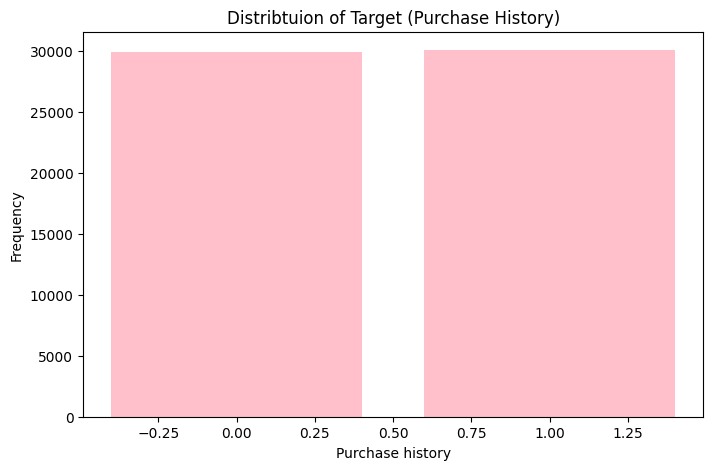

In [10]:
names = df["purchase_history"].value_counts().keys()
counts = df["purchase_history"].value_counts().values
plt.subplots(figsize=(8, 5))
plt.bar(names, counts, color="pink")
plt.xlabel("Purchase history")
plt.ylabel("Frequency")
plt.title("Distribtuion of Target (Purchase History)")
plt.show()

In [11]:
df["purchase_history"].value_counts(normalize=True)

purchase_history
True     0.501467
False    0.498533
Name: proportion, dtype: float64

The target feature data is Balanced. no need for imbalance treatment

In [12]:
#univariate analysis
def univariate(df,col,vartype,hue =None):
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(5,4))
        ax[0].set_title("Distribution Plot")
        plt.xlabel(col, fontsize=14);
        plt.ylabel('Density', fontsize=14);
        plt.suptitle('Plots for '+col, fontsize=18);
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots(figsize=(12,8))
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        plt.xlabel(col, fontsize=14);
        plt.ylabel('Number of occurrences', fontsize=14);
        plt.suptitle('Plots for '+col, fontsize=18);
        plt.legend(loc=1);
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))),
                 (p.get_x()+0.05, p.get_height()+20))
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
        del temp
    else:
        exit
    plt.show()

In [13]:
numerical_col=df.select_dtypes(include=['int64','float64'])
num=numerical_col.columns

In [14]:
object_col=df.select_dtypes(include=['object'])
obj=object_col.columns

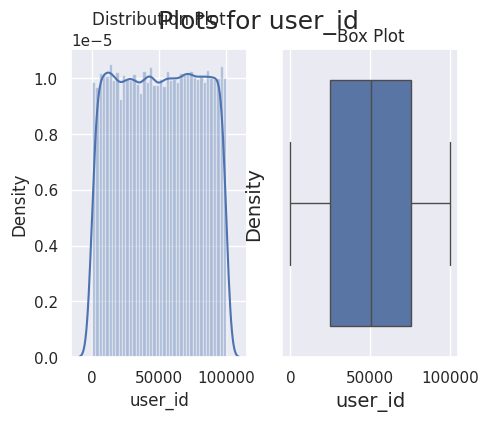

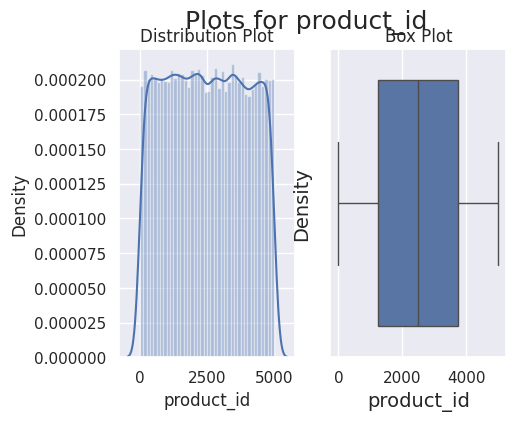

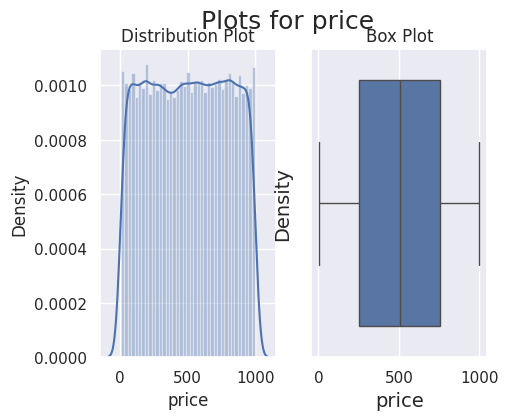

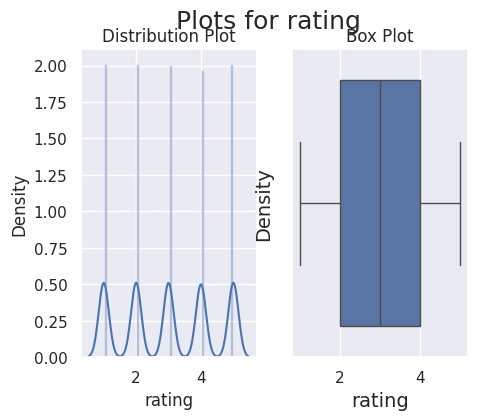

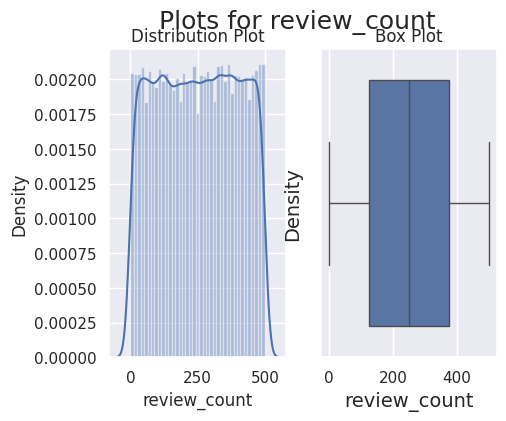

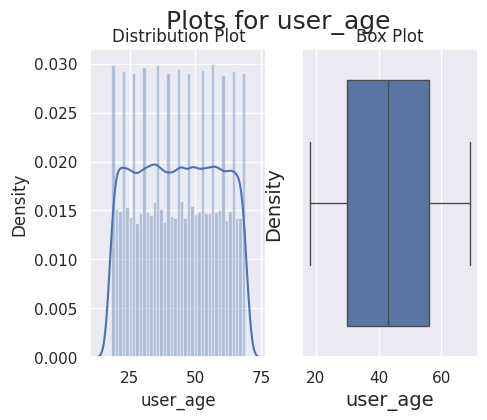

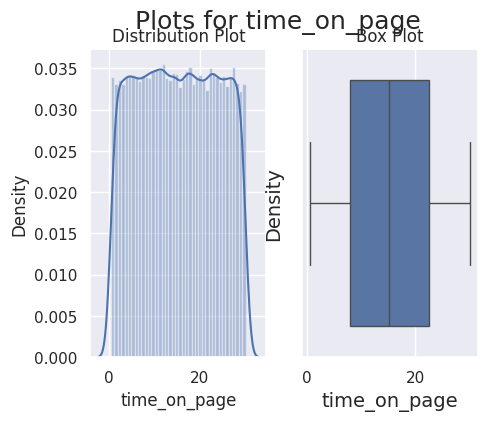

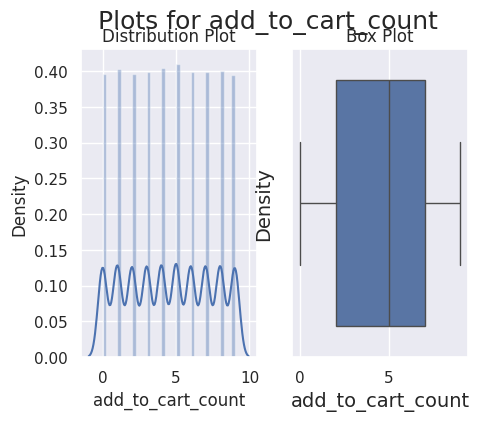

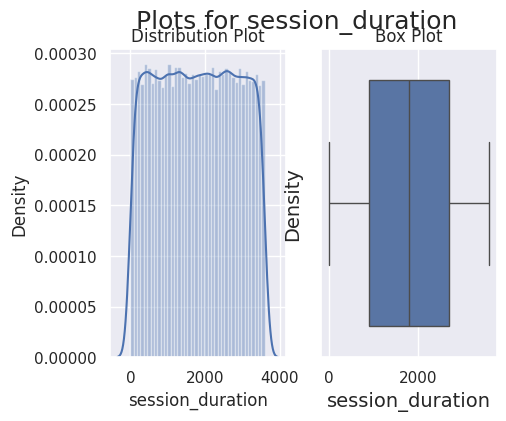

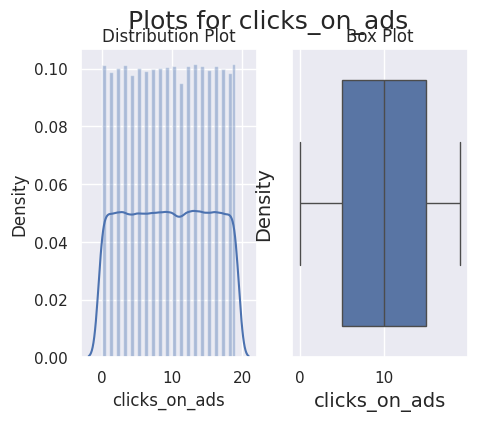

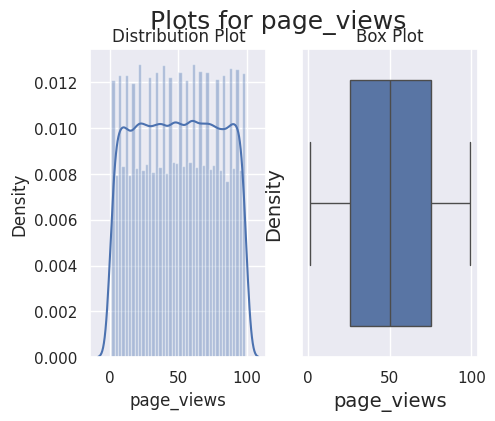

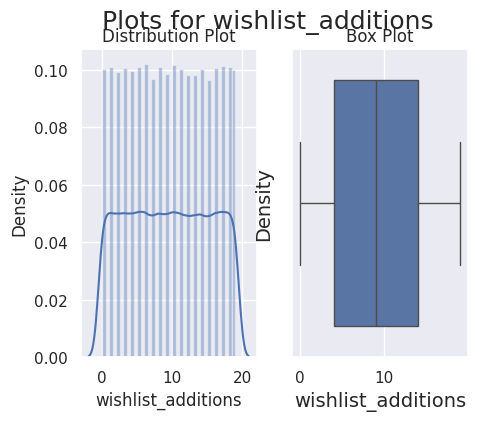

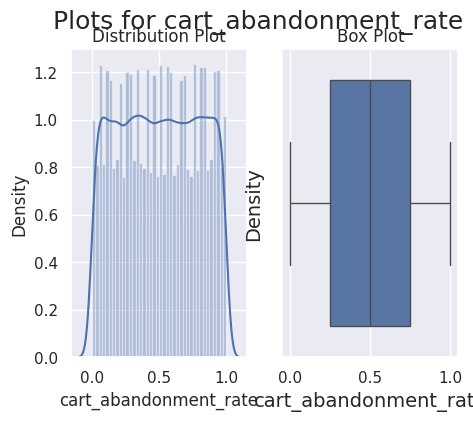

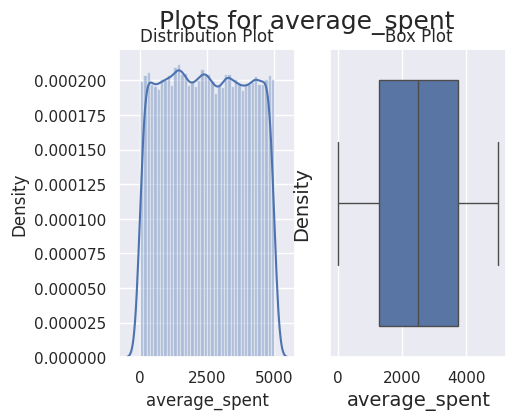

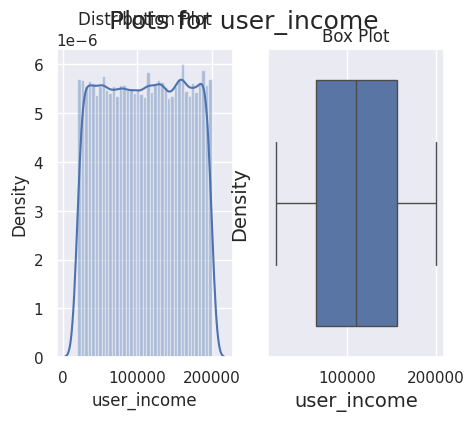

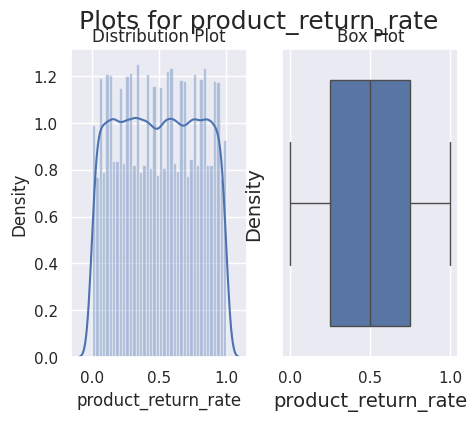

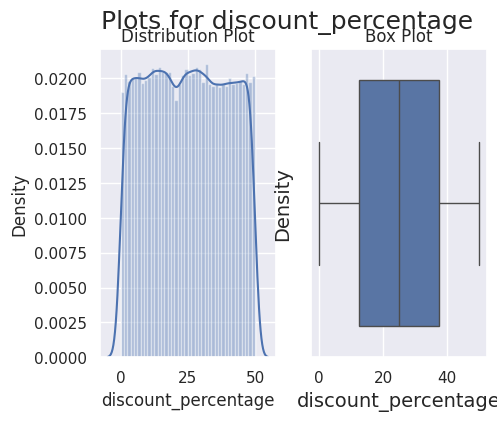

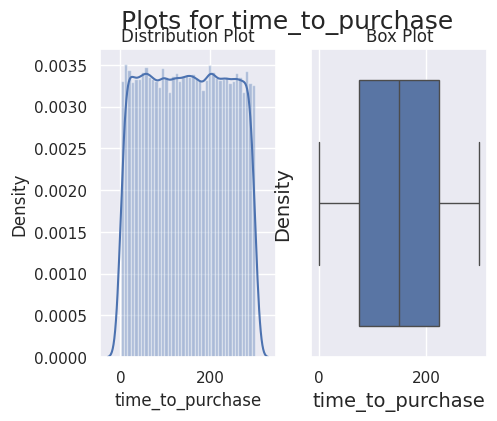

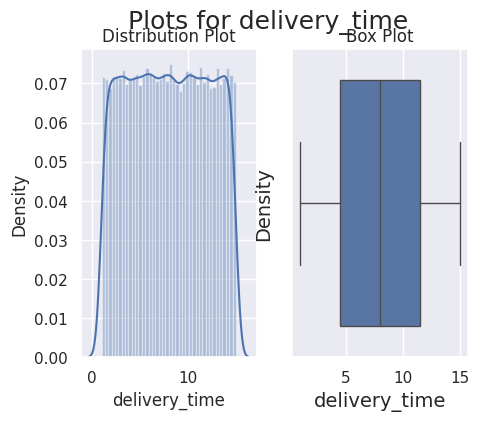

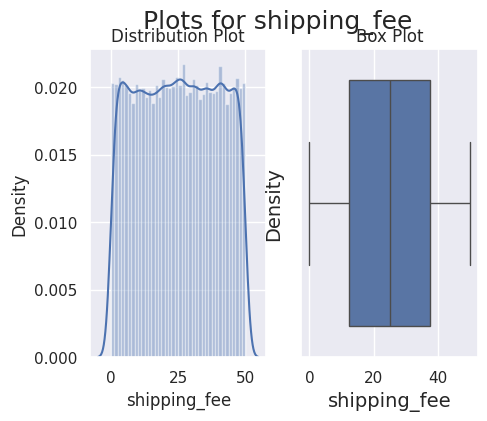

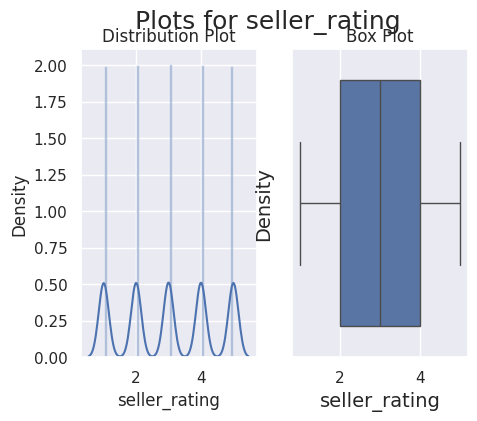

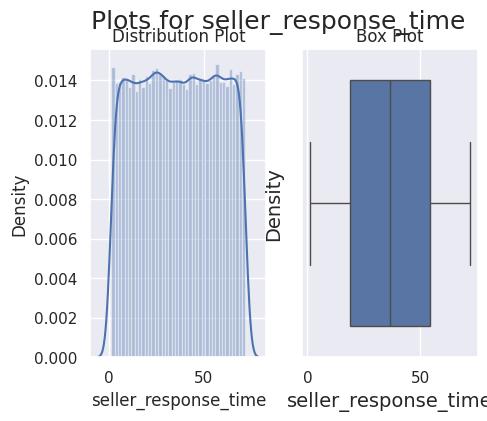

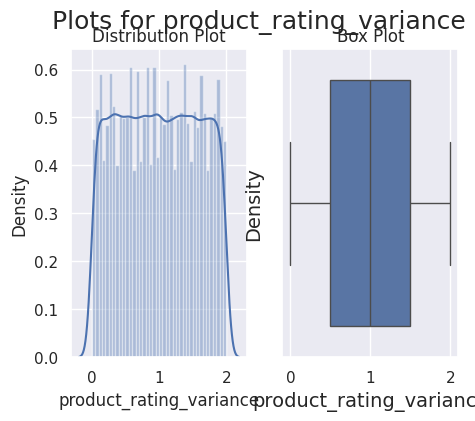

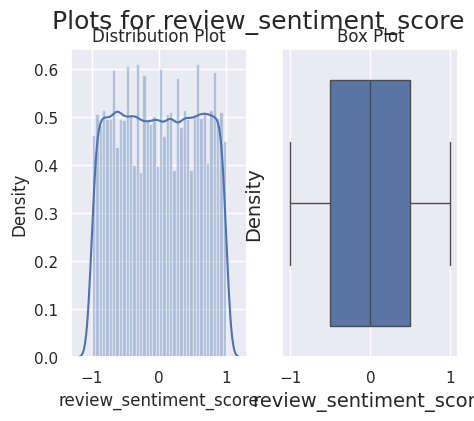

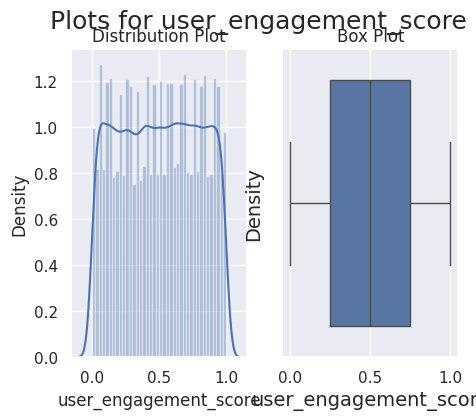

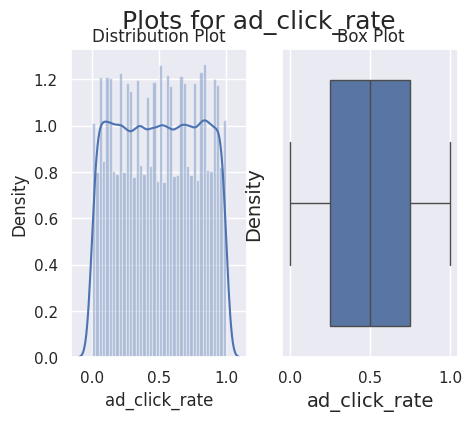

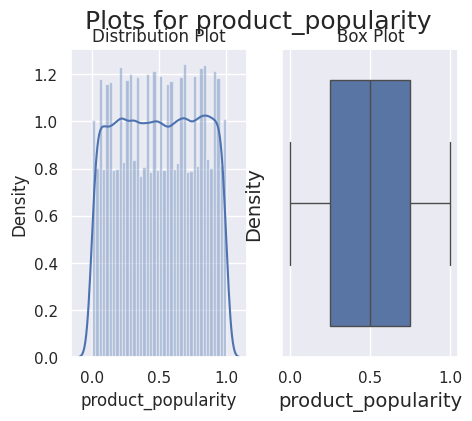

In [15]:
for col in df.columns:
  if col in num:
    univariate(df,col,0)

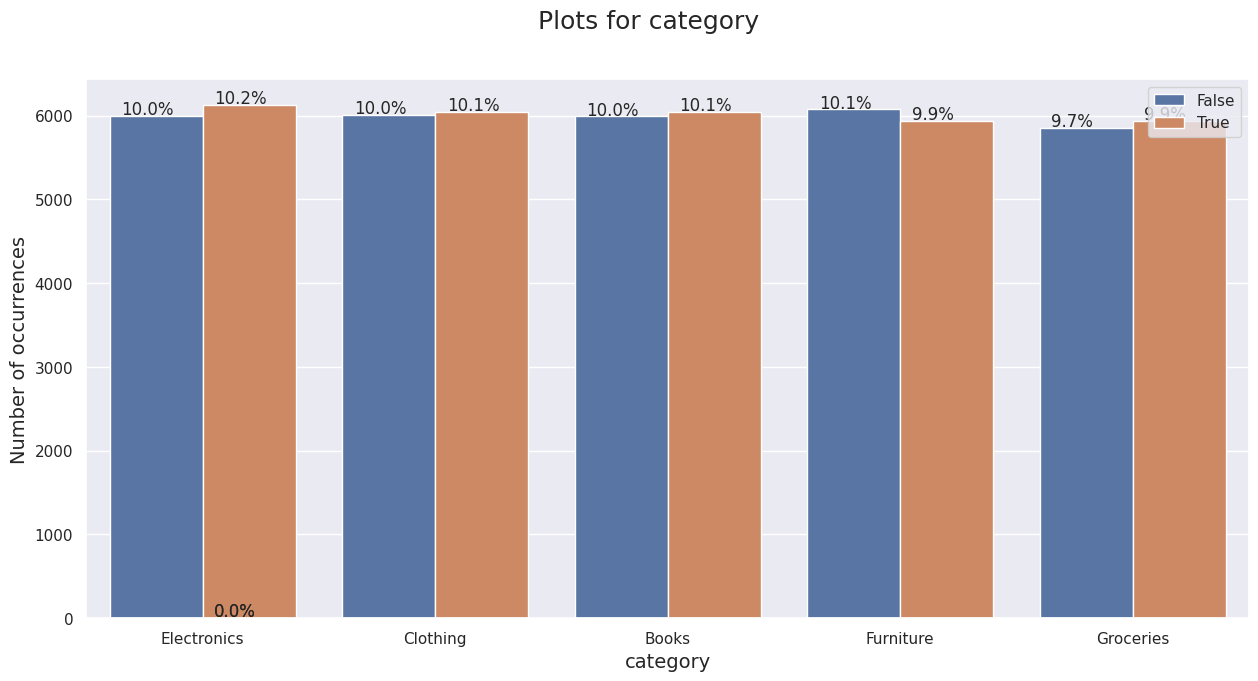

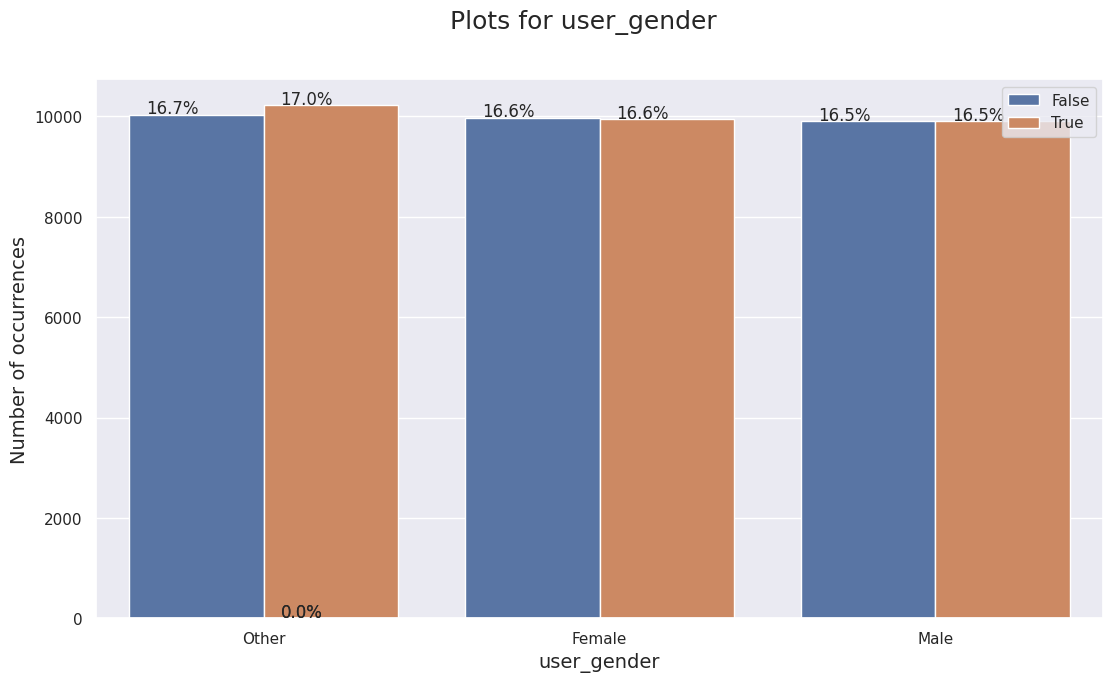

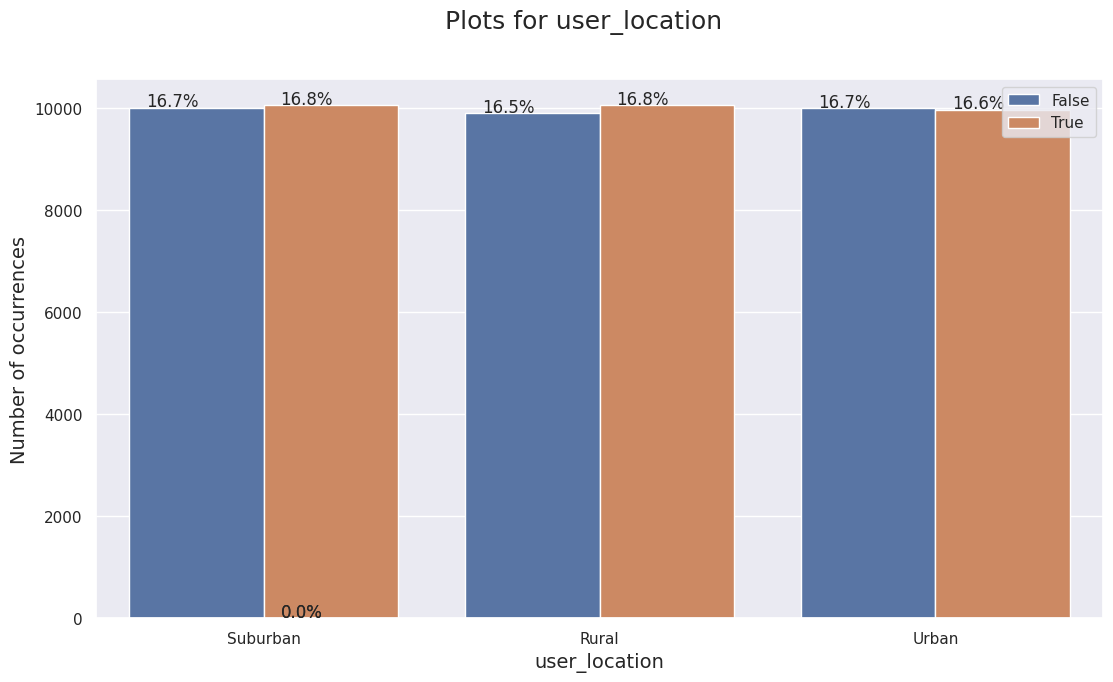

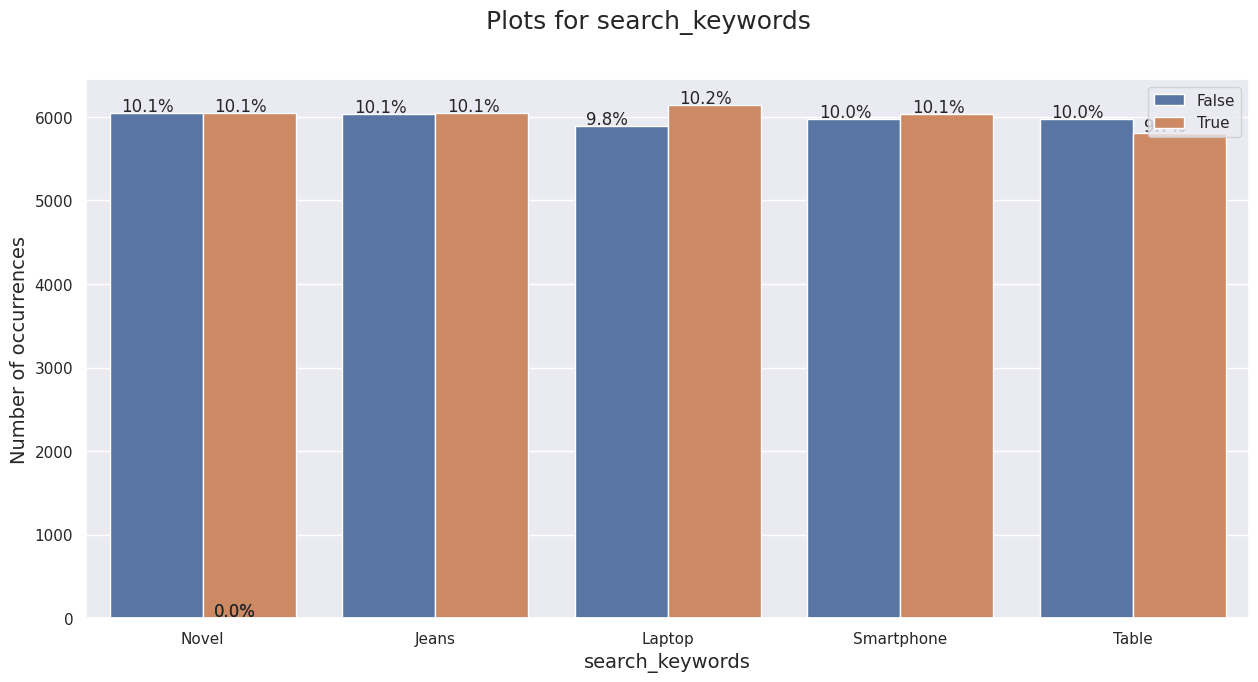

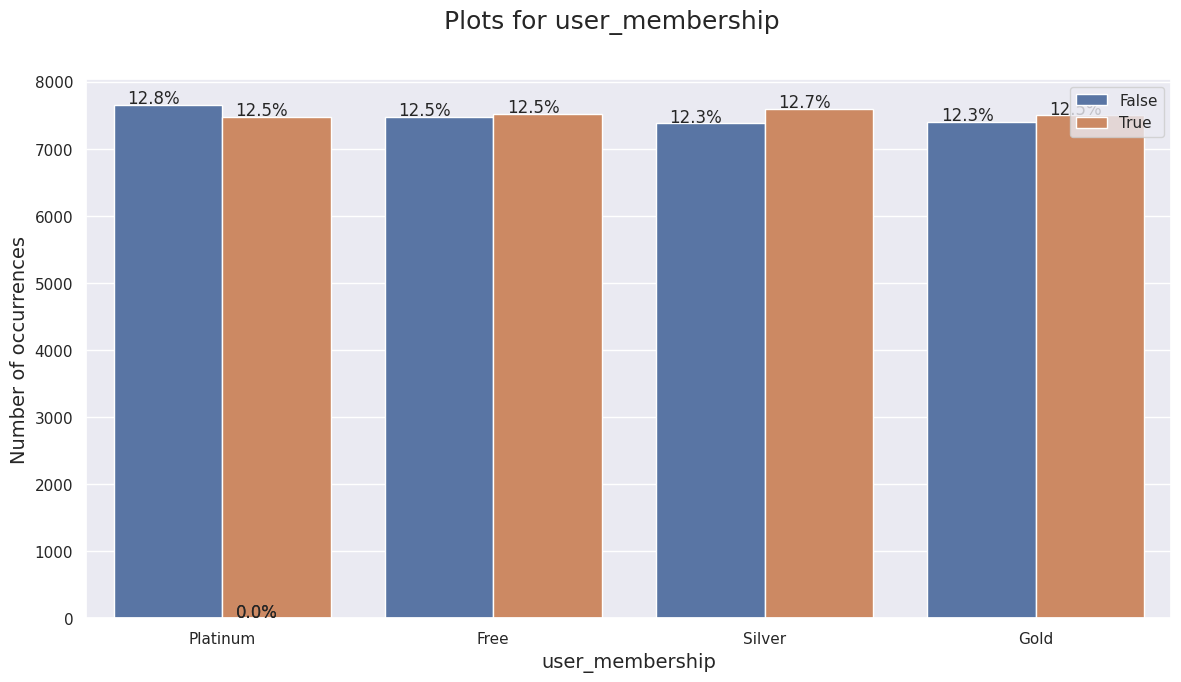

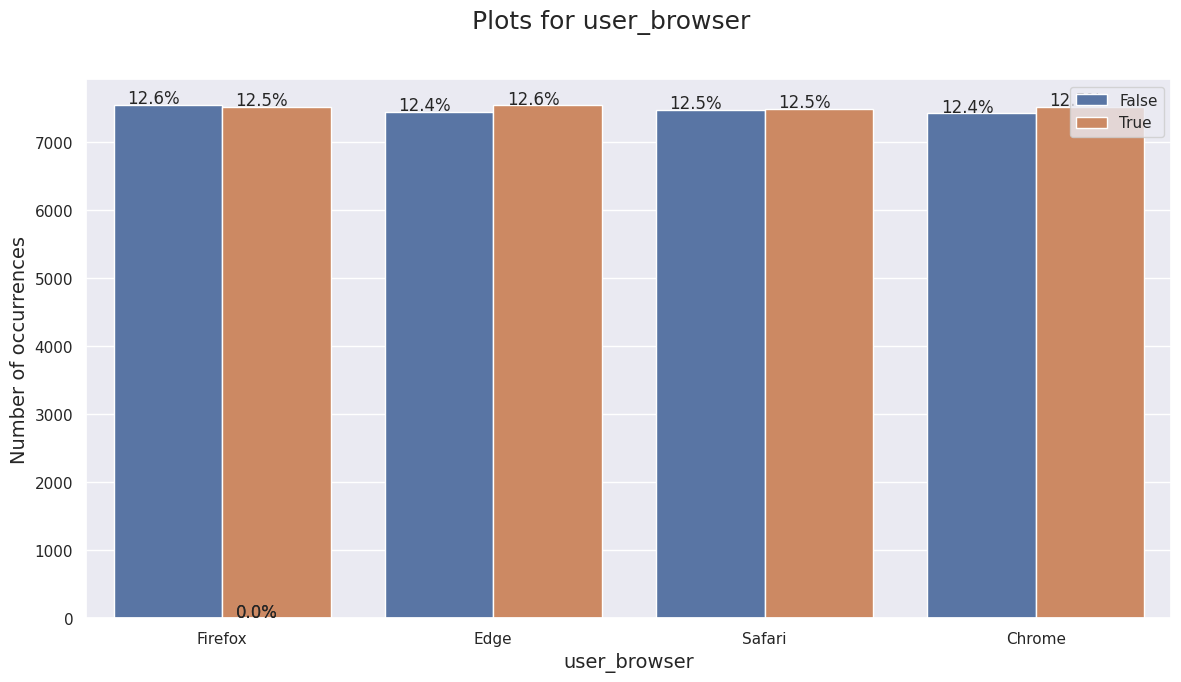

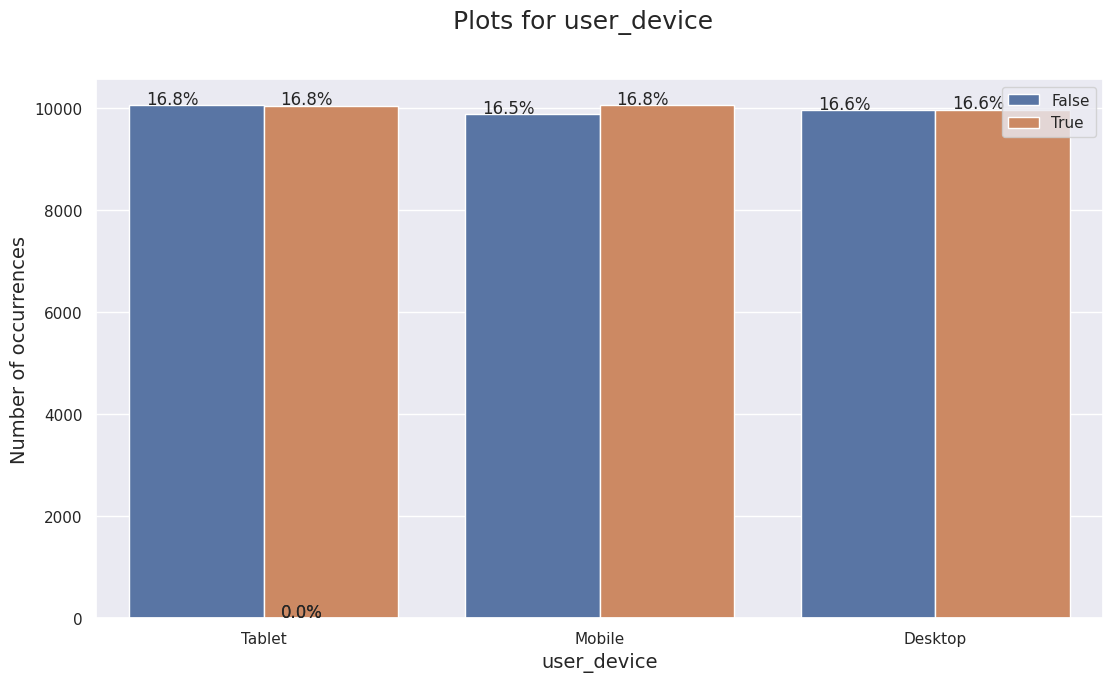

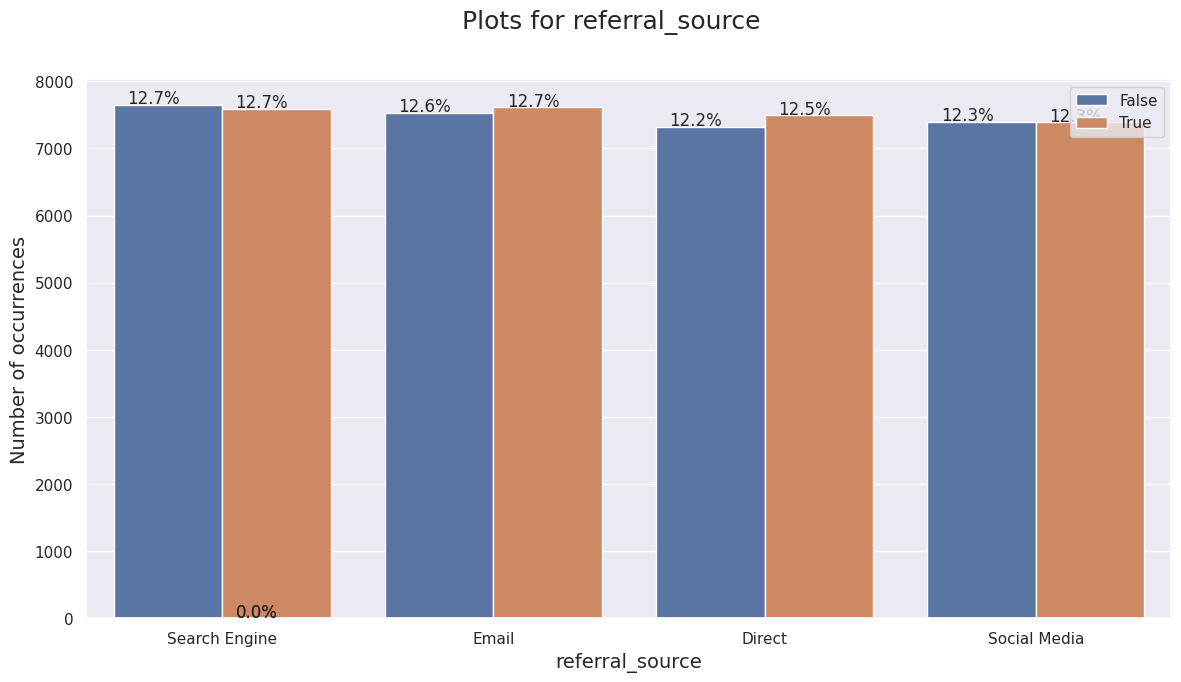

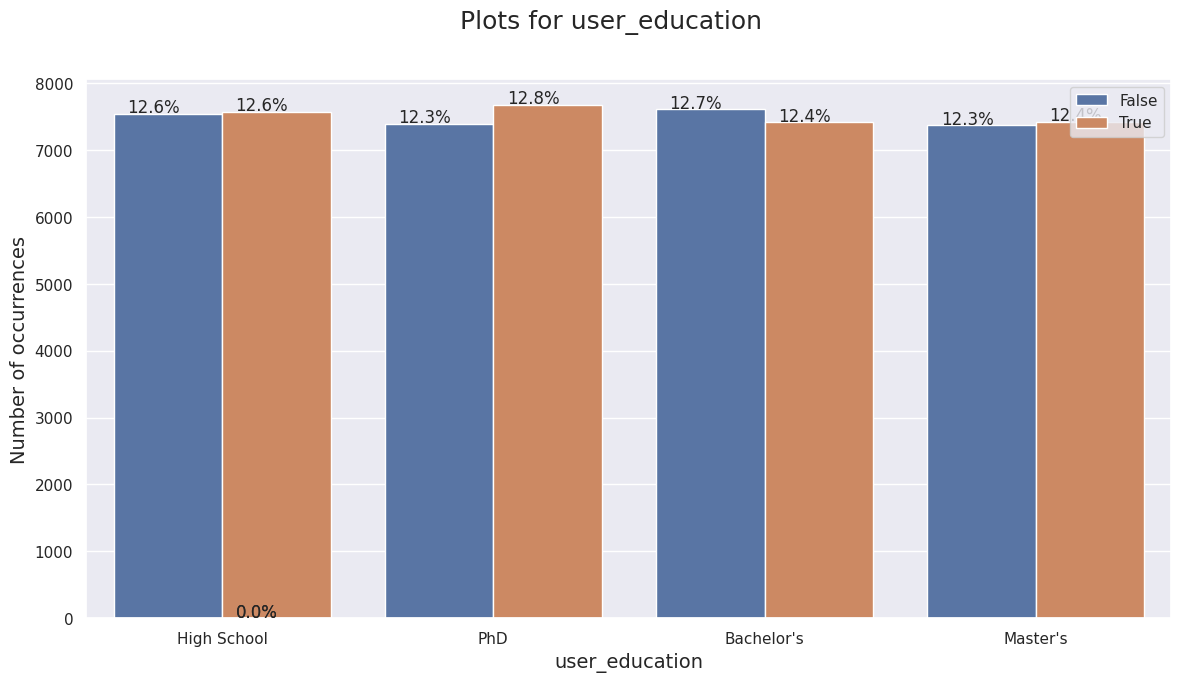

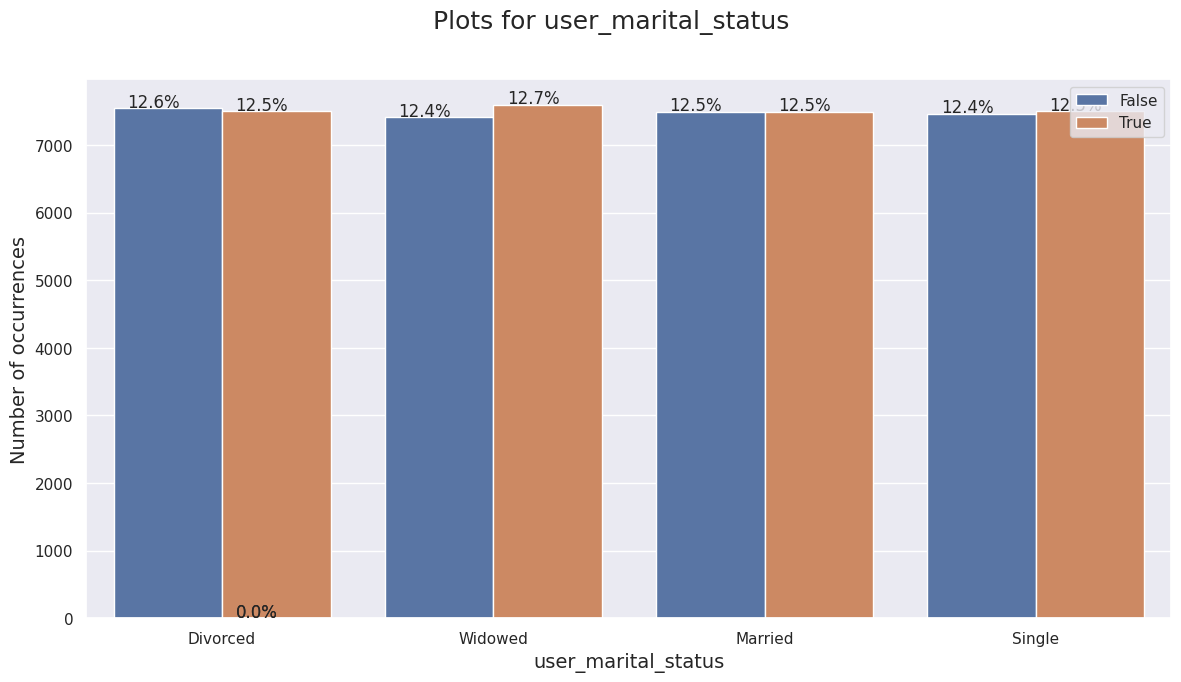

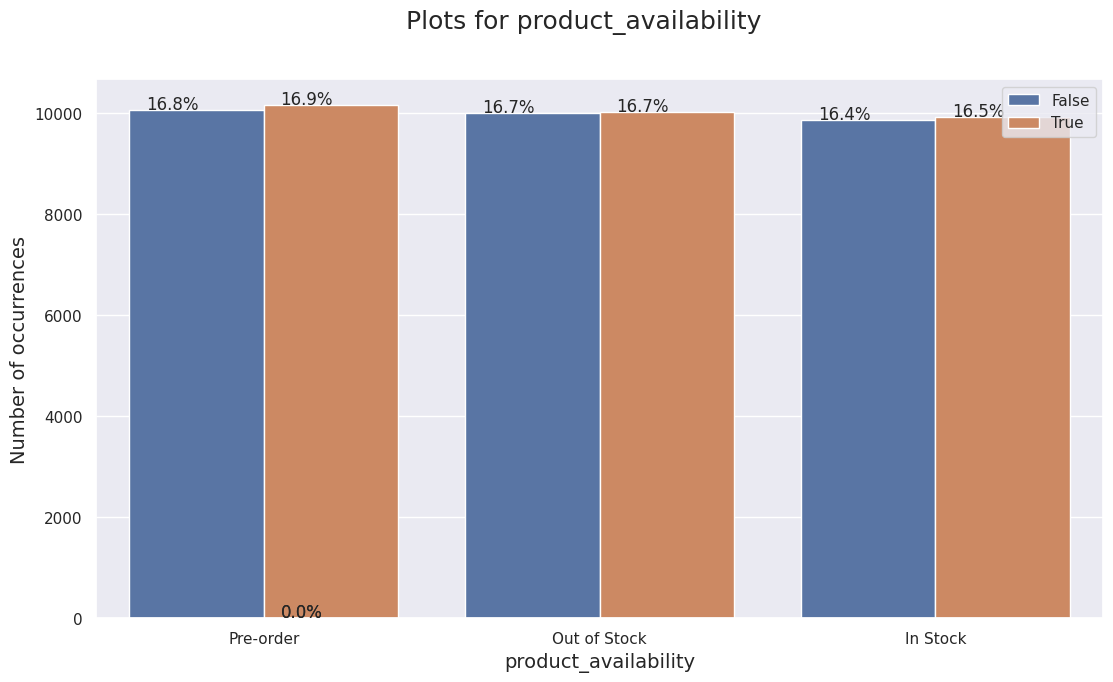

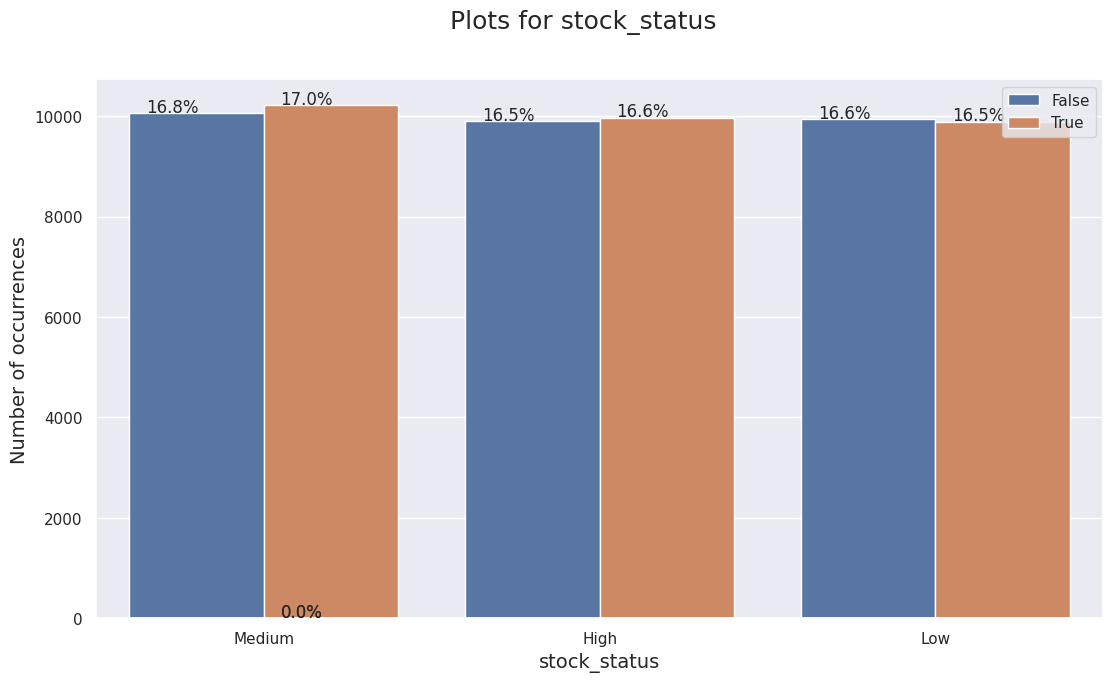

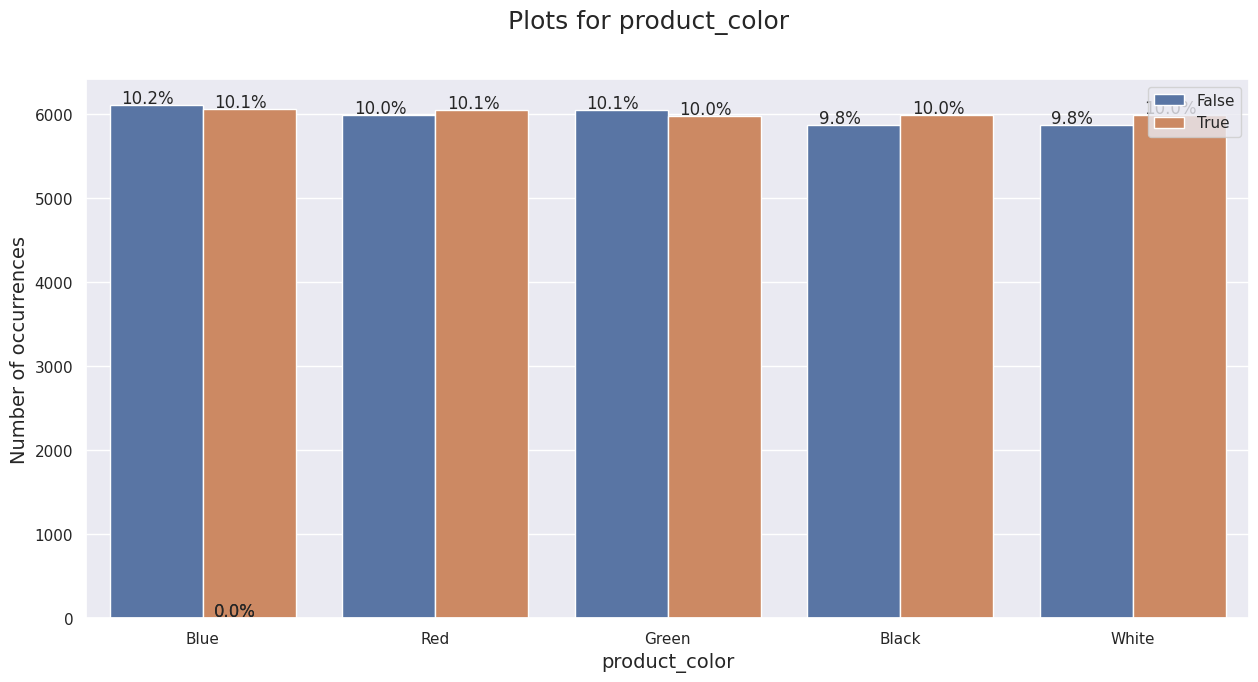

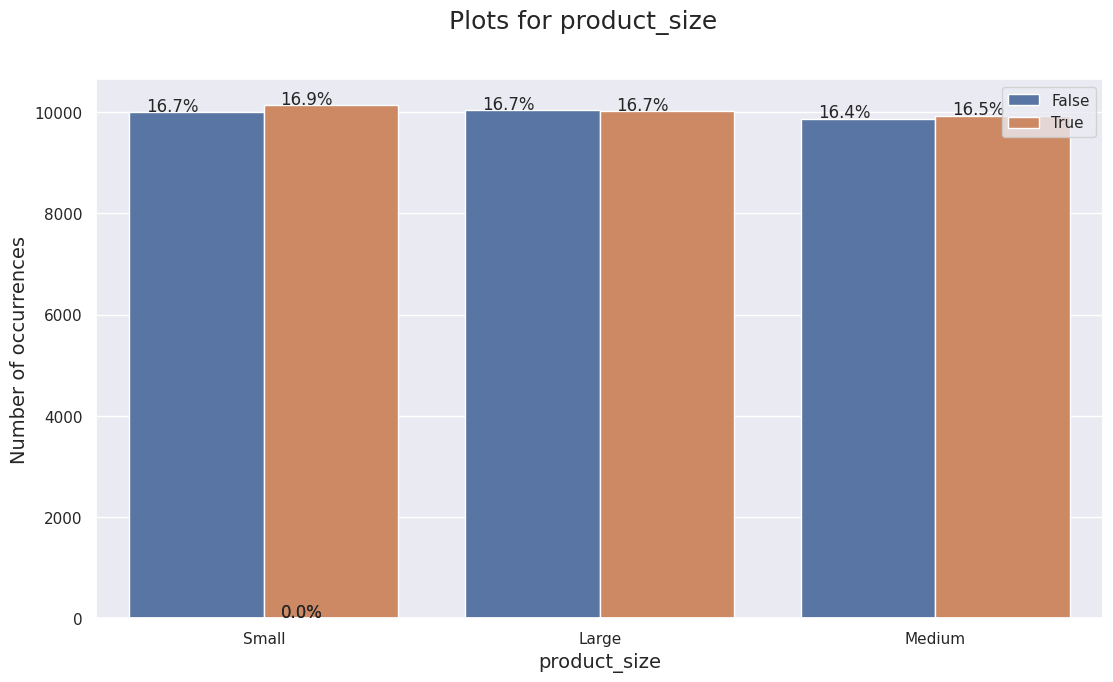

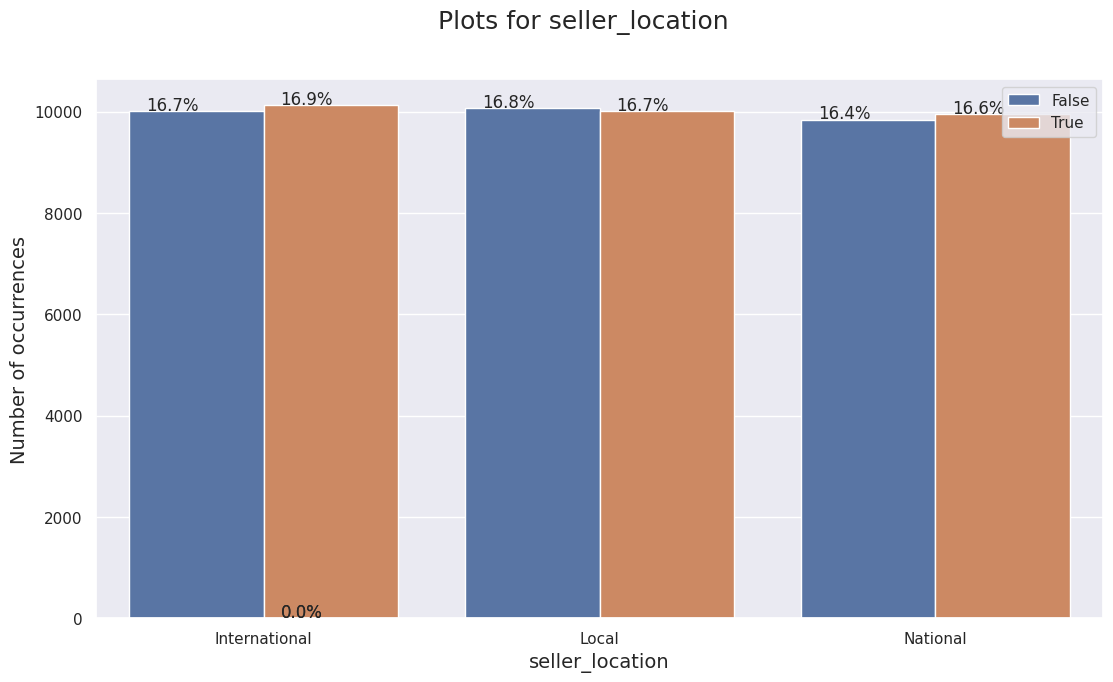

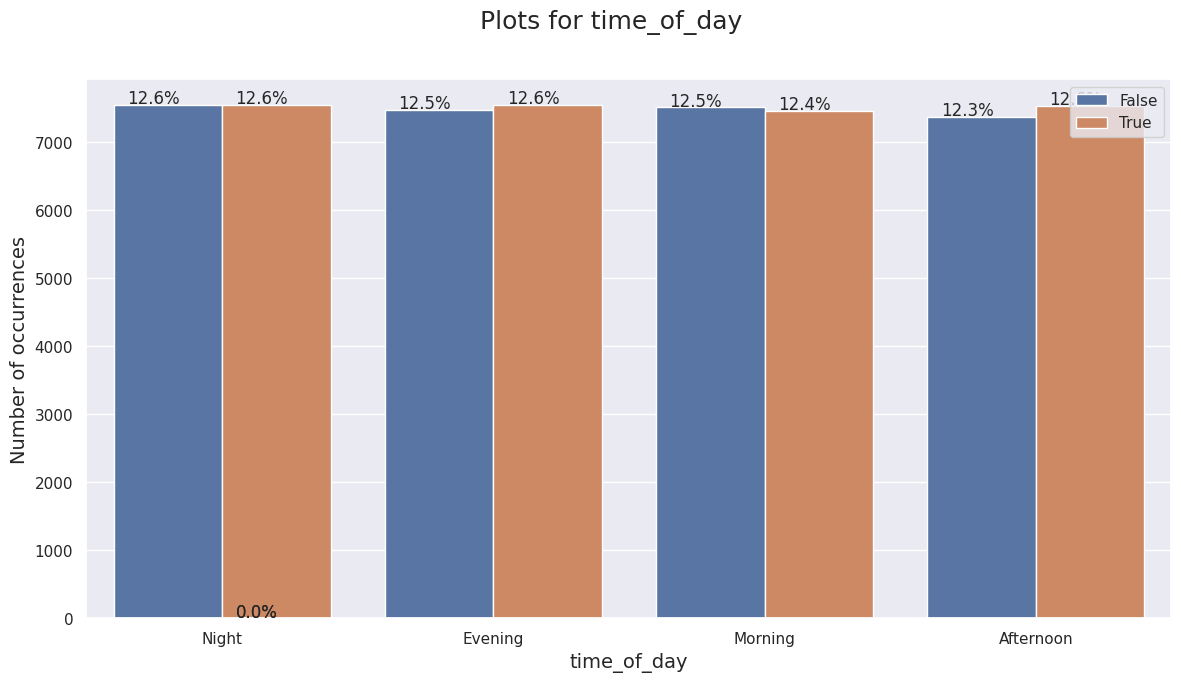

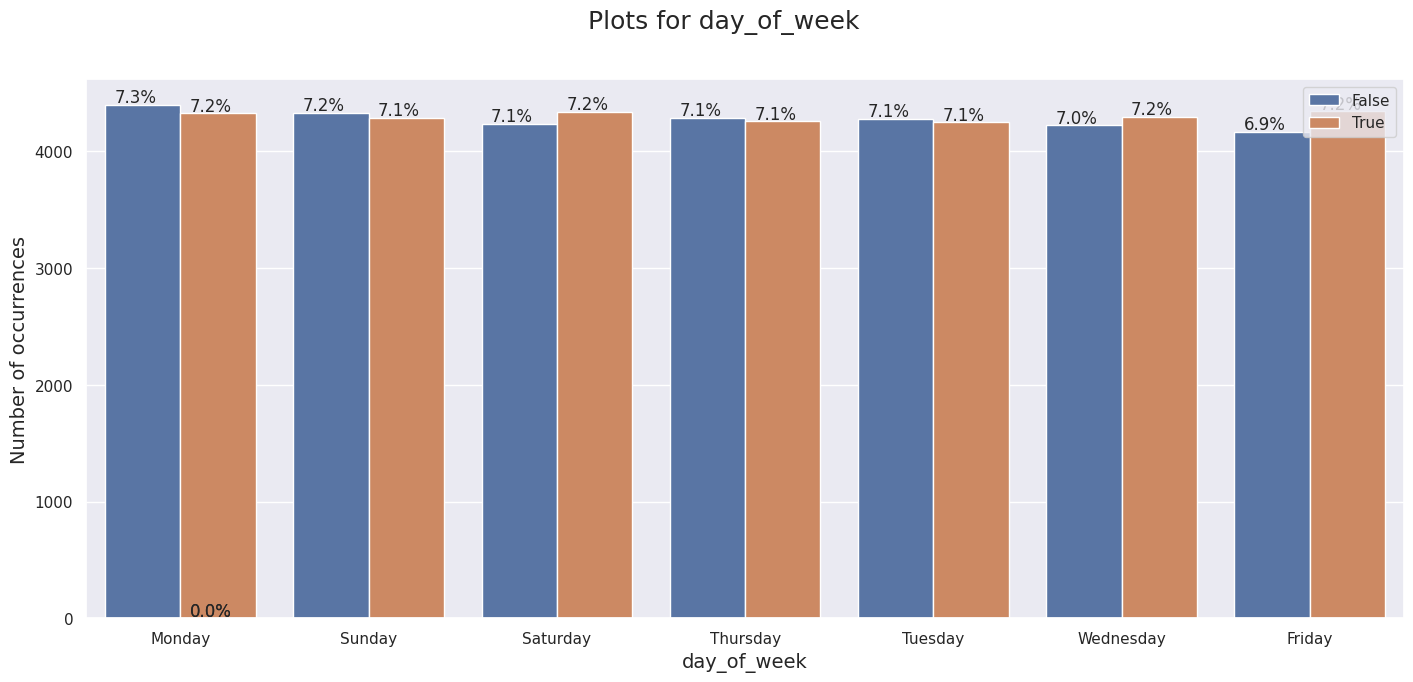

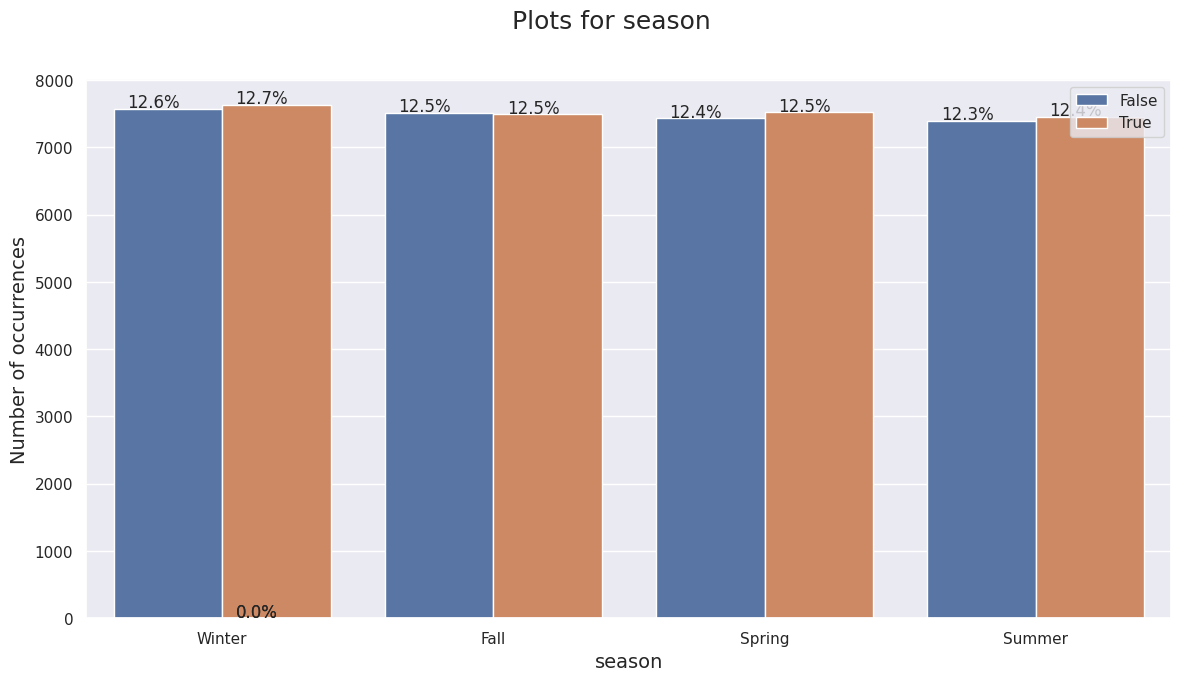

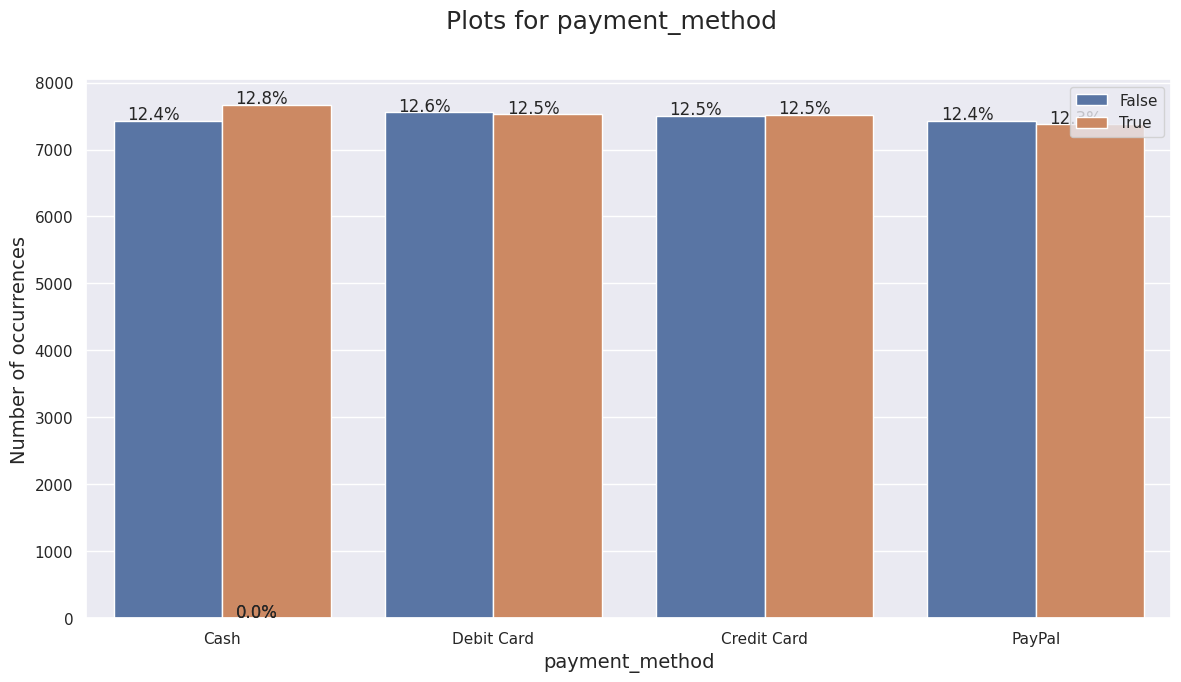

In [16]:
for col in df.columns:
  if col in obj:
    univariate(df,col,1,hue="purchase_history")

#Feature Enginerring

In [17]:
user_features = df.groupby('user_id').agg({
    'purchase_history': ['mean', 'sum', 'count'],
    'price': ['mean', 'sum'],
    'review_count': 'mean',
    'rating': 'mean',
    'time_on_page': 'mean',
    'add_to_cart_count': 'mean',
    'average_spent': 'mean',
    'clicks_on_ads': 'mean',
    'page_views': 'mean',
    'wishlist_additions': 'mean',
    'cart_abandonment_rate': 'mean',
    'user_engagement_score': 'mean'
})

user_features.columns = [
    'user_purchase_rate', 'user_total_purchases', 'user_total_interactions',
    'user_avg_price', 'user_total_spent', 'user_avg_review_count',
    'user_avg_rating', 'user_avg_time_on_page', 'user_avg_add_to_cart',
    'user_avg_spent', 'user_avg_clicks_ads', 'user_avg_page_views',
    'user_avg_wishlist_adds', 'user_avg_cart_abandon_rate',
    'user_avg_engagement'
]

In [18]:
product_features = df.groupby('product_id').agg({
    'purchase_history': ['mean', 'sum', 'count'],
    'price': ['mean'],
    'rating': ['mean'],
    'review_count': 'mean',
    'discount_percentage': 'mean',
    'product_return_rate': 'mean',
    'review_sentiment_score': 'mean',
    'product_rating_variance': 'mean'
})

product_features.columns = [
    'product_purchase_rate', 'product_total_purchases', 'product_total_interactions',
    'product_avg_price', 'product_avg_rating', 'product_avg_review_count',
    'product_avg_discount', 'product_avg_return_rate', 'product_avg_sentiment',
    'product_avg_rating_var'
]

In [19]:
df = df.merge(user_features, on='user_id', how='left')
df = df.merge(product_features, on='product_id', how='left')

In [20]:
product_stats = df.groupby('product_id').agg({
    'user_id': 'nunique',
    'rating': 'mean',
    'review_count': 'mean'
}).rename(columns={
    'user_id': 'product_popularity',
    'rating': 'avg_product_rating'
})
df = df.merge(product_stats, on='product_id', how='left')


In [21]:
user_cat_interest = df.groupby(['user_id', 'category']).size().reset_index(name='user_category_views')
user_total_views = df.groupby('user_id').size().reset_index(name='total_views')
df = df.merge(user_cat_interest, on=['user_id', 'category'], how='left')
df = df.merge(user_total_views, on='user_id', how='left')
df['user_category_interest'] = df['user_category_views'] / df['total_views']


In [22]:
df.fillna(0, inplace=True)

In [23]:
df = df.drop(['user_id', 'product_id'], axis=1)

In [24]:
categorical_cols = [
    'category', 'user_gender', 'user_location', 'user_membership', 'user_browser',
    'user_device', 'referral_source', 'product_color', 'product_size',
    'stock_status', 'seller_location', 'payment_method', 'user_education','search_keywords',
    'user_marital_status', 'season', 'day_of_week', 'time_of_day', 'coupon_used','product_availability'
]

In [25]:
#%pip install category-encoders

In [26]:
# Target encoding
from category_encoders import TargetEncoder
te = TargetEncoder(cols=categorical_cols)
df = te.fit_transform(df, df['purchase_history'])


In [27]:
bool_cols = ['is_top_seller', 'discount_applied', 'purchase_history']
df[bool_cols] = df[bool_cols].astype(int)

In [28]:
df['purchase_time'] = pd.to_datetime(df['purchase_time'], errors='coerce')

# Extract time-based features
df['purchase_hour'] = df['purchase_time'].dt.hour
df['purchase_dayofweek'] = df['purchase_time'].dt.dayofweek  # 0=Monday
df['purchase_month'] = df['purchase_time'].dt.month
df['is_weekend'] = df['purchase_dayofweek'].isin([5, 6]).astype(int)


In [29]:
df = df.drop('purchase_time', axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    60000 non-null  float64
 1   price                       60000 non-null  float64
 2   rating                      60000 non-null  int64  
 3   review_count_x              60000 non-null  int64  
 4   user_age                    60000 non-null  int64  
 5   user_gender                 60000 non-null  float64
 6   user_location               60000 non-null  float64
 7   purchase_history            60000 non-null  int64  
 8   time_on_page                60000 non-null  float64
 9   add_to_cart_count           60000 non-null  int64  
 10  search_keywords             60000 non-null  float64
 11  discount_applied            60000 non-null  int64  
 12  user_membership             60000 non-null  float64
 13  user_browser                600

In [31]:
df['interaction_rate'] = df['user_total_interactions'] / (df['user_total_purchases'] + 1)
df['cart_conversion_rate'] = df['user_total_purchases'] / (df['add_to_cart_count'] + 1)

In [32]:
df.drop(['user_purchase_rate', 'product_purchase_rate'], axis=1,inplace=True)

In [33]:
X = df.drop('purchase_history', axis=1)
y = df['purchase_history']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [36]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [37]:
X_train.head()

category     price    rating  review_count_x  user_age  user_gender  \
11864  0.536574  0.617973 -0.698986       -0.892042  0.301569     1.382472   
20176 -1.878704  1.538333 -0.698986       -1.638332 -1.701360     1.382472   
6940   0.536574 -0.723873  1.414927       -0.608728 -0.566367     1.382472   
31877  0.028776  0.341959 -1.403624        1.222448 -1.033717    -0.905555   
19957  1.060106 -1.012352 -1.403624        0.006271 -0.165781    -0.905555   

       user_location  time_on_page  add_to_cart_count  search_keywords  \
11864      -1.182256      1.049915          -0.525549        -0.219688   
20176      -1.182256     -0.267579          -1.225201        -0.219688   
6940       -0.093193     -1.607463           1.223583        -1.502636   
31877      -1.182256     -1.656957           0.523931        -1.502636   
19957      -0.093193      1.250250           0.174104        -0.152160   

       discount_applied  user_membership  user_browser  user_device  \
11864         -1.003590        -0.012157     -1.373212     1.411089   
20176         -1.003590         0.358615      1.018951    -0.823244   
6940          -1.003590        -0.012157      1.018951     1.411089   
31877          0.996423        -1.537872      0.887270     1.411089   
19957          0.996423        -1.537872      0.887270    -0.823244   

       session_duration  clicks_on_ads  page_views  referral_source  \
11864          0.316991       0.949139   -1.475610        -0.622599   
20176          0.200330      -0.783058    0.803702         0.351027   
6940           0.328632      -0.090179    1.154366        -1.164055   
31877          1.302693      -0.090179   -0.143089         0.351027   
19957          0.710898       1.642018   -1.475610        -0.622599   

       wishlist_additions  cart_abandonment_rate  average_spent  user_income  \
11864            0.083382               1.344974       1.732865     0.564480   
20176            1.120350               0.550451      -0.439464    -0.708017   
6940            -0.953586               0.757718      -1.491342     0.867003   
31877           -0.607930              -1.660397       1.074042    -1.307438   
19957           -0.953586              -1.004052       0.572792     1.311278   

       user_education  user_marital_status  product_availability  \
11864        0.056117            -0.070476             -1.225434   
20176       -1.408903             1.629875             -1.225434   
6940         1.413211            -0.070476             -1.225434   
31877       -0.067287            -0.541362              1.213779   
19957        0.056117            -0.541362             -1.225434   

       stock_status  product_return_rate  product_color  product_size  \
11864      1.135141            -1.631893       1.023048      1.211554   
20176      1.135141            -1.144757       1.023048     -1.229454   
6940       0.135745             0.281855       1.023048      1.211554   
31877      1.135141             0.247060       0.343349      1.211554   
19957      1.135141             1.638876      -1.296881      0.015566   

       is_top_seller  discount_percentage  time_to_purchase  delivery_time  \
11864      -1.001209            -0.516649          0.438518       0.024992   
20176       0.998792            -0.405429         -0.157393       0.255174   
6940        0.998792            -0.763418         -1.658234      -0.702680   
31877      -1.001209            -0.166307          1.054699      -1.554106   
19957      -1.001209            -1.681675          1.706091      -1.435302   

       shipping_fee  seller_rating  seller_response_time  seller_location  \
11864      1.364973      -0.709087             -1.129859         0.564513   
20176      0.246218       0.706581              1.248873         0.564513   
6940      -0.582464       1.414414              0.106808        -1.399405   
31877      1.364280      -0.001253              1.486843        -1.399405   
19957      0.344524       0.706581             -0.603691

In [38]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
def model_report(model):

    model_pred_train = model.predict(X_train)

    model_pred_test = model.predict(X_test)

    print("Classification Report Train: ")
    print(classification_report(y_train, model_pred_train))

    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))

    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))

    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))

    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train,model_pred_train))

    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))

In [40]:
model_report(logit_model)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     23930
           1       0.90      0.91      0.91     24070

    accuracy                           0.91     48000
   macro avg       0.91      0.91      0.91     48000
weighted avg       0.91      0.91      0.91     48000

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5982
           1       0.90      0.90      0.90      6018

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy Score Train:  0.9063541666666667
Accuracy Score Test:  0.9031666666666667
Confusion Matrix Train: 
[[21611  2319]
 [ 2176 21894]]
Confusion Matrix Test: 
[[5411  571]
 [ 591 5427]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23930
           1       1.00      1.00      1.00     24070

    accuracy                           1.00     48000
   macro avg       1.00      1.00      1.00     48000
weighted avg       1.00      1.00      1.00     48000

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5982
           1       0.89      0.90      0.90      6018

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy Score Train:  1.0
Accuracy Score Test:  0.8968333333333334
Confusion Matrix Train: 
[[23930     0]
 [    0 24070]]
Confusion Matrix Test: 
[[5343  639]
 [ 599 5419]]


In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [44]:
model_report(xgb)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23930
           1       0.99      0.99      0.99     24070

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5982
           1       0.89      0.89      0.89      6018

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Accuracy Score Train:  0.9895625
Accuracy Score Test:  0.893
Confusion Matrix Train: 
[[23690   240]
 [  261 23809]]
Confusion Matrix Test: 
[[5340  642]
 [ 642 5376]]


In [45]:

parameter = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 400, 600],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 0.5, 1]
    }
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

random_search_xgb = RandomizedSearchCV(estimator=xgb_model,
                             param_distributions = parameter,
                             scoring='roc_auc',
                             n_jobs=-1,
                             n_iter=10,
                             random_state=42,
                             verbose=1,
                             cv=2
                            )

random_search_xgb.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [200, 400, 600],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 5, 10],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [46]:
random_search_xgb.best_params_, random_search_xgb.best_score_

({'subsample': 1.0,
  'reg_lambda': 5,
  'reg_alpha': 1,
  'n_estimators': 400,
  'max_depth': 5,
  'learning_rate': 0.01,
  'colsample_bytree': 0.8},
 np.float64(0.9789285533852632))

In [47]:
best_params=random_search_xgb.best_params_

In [48]:
refined_xgb_model = XGBClassifier(objective='binary:logistic',
                                  eval_metric='logloss',
                                  random_state=42,
                                  use_label_encoder=False,
                                  **best_params).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.3f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.3f}'.format(refined_xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.908
Accuracy of XGB classifier on test set: 0.903


In [49]:
model_report(refined_xgb_model)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     23930
           1       0.91      0.91      0.91     24070

    accuracy                           0.91     48000
   macro avg       0.91      0.91      0.91     48000
weighted avg       0.91      0.91      0.91     48000

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5982
           1       0.90      0.90      0.90      6018

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy Score Train:  0.9083125
Accuracy Score Test:  0.903
Confusion Matrix Train: 
[[21689  2241]
 [ 2160 21910]]
Confusion Matrix Test: 
[[5403  579]
 [ 585 5433]]


In [50]:
y_pred=refined_xgb_model.predict(X_test)

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(refined_xgb_model, X, y, cv=5, scoring='accuracy')
print(scores)
print("Average score = ",scores.mean())

[0.90558333 0.90716667 0.90533333 0.90441667 0.90408333]
Average score =  0.9053166666666665


In [52]:
#Feature Importance
feature_names = X_train.columns
importance_gain = refined_xgb_model.feature_importances_
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_gain
})
if fi_df['importance'].dtype == 'object':
    fi_df['importance'] = pd.to_numeric(fi_df['importance'], errors='coerce')

fi_df = fi_df.sort_values(by='importance', ascending=False)
print(fi_df.head(20))

                       feature  importance
80            interaction_rate    0.329465
81        cart_conversion_rate    0.240091
47        user_total_purchases    0.193786
48     user_total_interactions    0.062504
74                 total_views    0.059565
73         user_category_views    0.023744
8            add_to_cart_count    0.015105
61     product_total_purchases    0.006547
75      user_category_interest    0.006416
70        product_popularity_y    0.003378
62  product_total_interactions    0.003198
50            user_total_spent    0.001806
49              user_avg_price    0.001770
54        user_avg_add_to_cart    0.001614
57         user_avg_page_views    0.001421
63           product_avg_price    0.001375
7                 time_on_page    0.001352
32               delivery_time    0.001322
21                 user_income    0.001305
72              review_count_y    0.001260


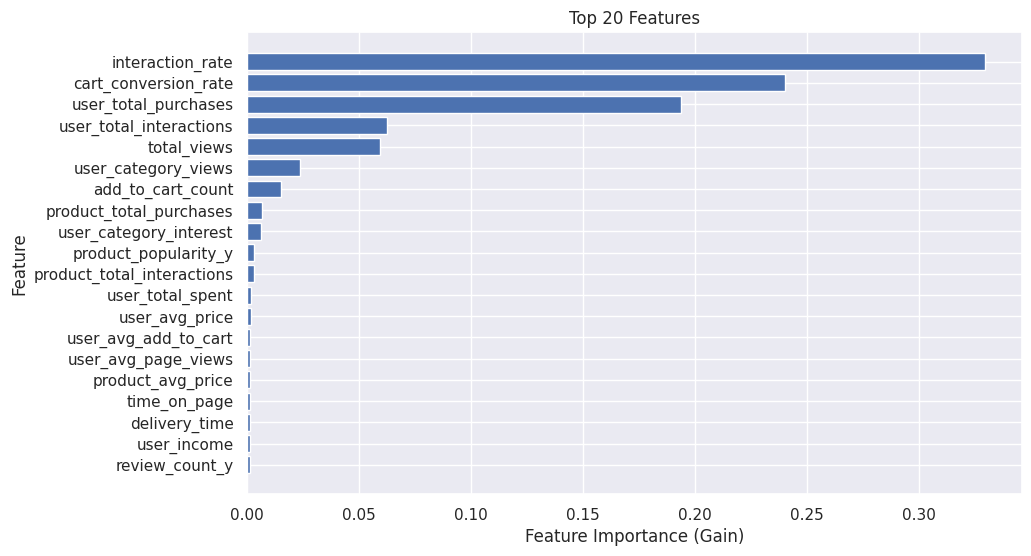

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'][:20][::-1], fi_df['importance'][:20][::-1])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('Top 20 Features')
plt.show()

In [54]:
def get_confusion_matrix(y_test, y_pred):
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                              rownames=['Actual'],
                              colnames=['Predicted'])

    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()

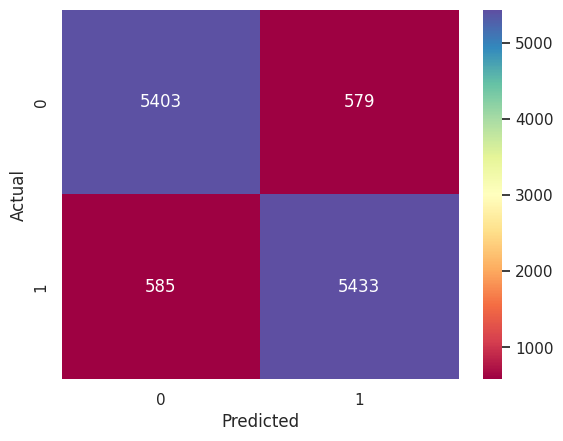

In [55]:
get_confusion_matrix(np.array(y_test), np.array(y_pred))

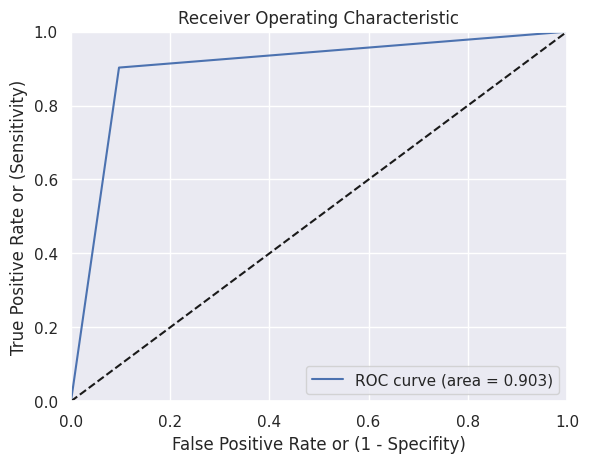

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

 The model can predict the customer purchase behaviour with 90% accuracy